Before you run this code you will need to download the 'vgg19_weights.h5' file and put it to the same folder with this file.
You can download it from here: http://files.heuritech.com/weights/vgg19_weights.h5

Based on http://euler.stat.yale.edu/~tba3/stat665/lectures/lec18/notebook18.html


In [1]:
import scipy.io
import scipy.misc
import tensorflow as tf
import numpy as np
import time
#from IPython.display import Image

from PIL import Image

from keras import backend
backend.set_image_dim_ordering('th')

from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD

from keras.utils.vis_utils import plot_model

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

/home/bapoczos/anaconda2/envs/tensorflow_python27/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='softmax'))

/home/bapoczos/anaconda2/envs/tensorflow_python27/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bapoczos/anaconda2/envs/tensorflow_python27/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/home/bapoczos/anaconda2/envs/tensorflow_python27/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if __name__ == '__main__':
/home/bapoczos/anaconda2/envs/tensorflow_python27/lib/python2.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/home/bapoczos

In [3]:
model.load_weights("./vgg19_weights.h5")

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 3, 226, 226)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 224, 224)      1792      
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 64, 226, 226)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 224, 224)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 112, 112)      0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 64, 114, 114)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 112, 112)     73856     
__________

In [5]:
plot_model(model, show_shapes=True, to_file='model.png')

In [6]:
img_model=Image.open('model.png')

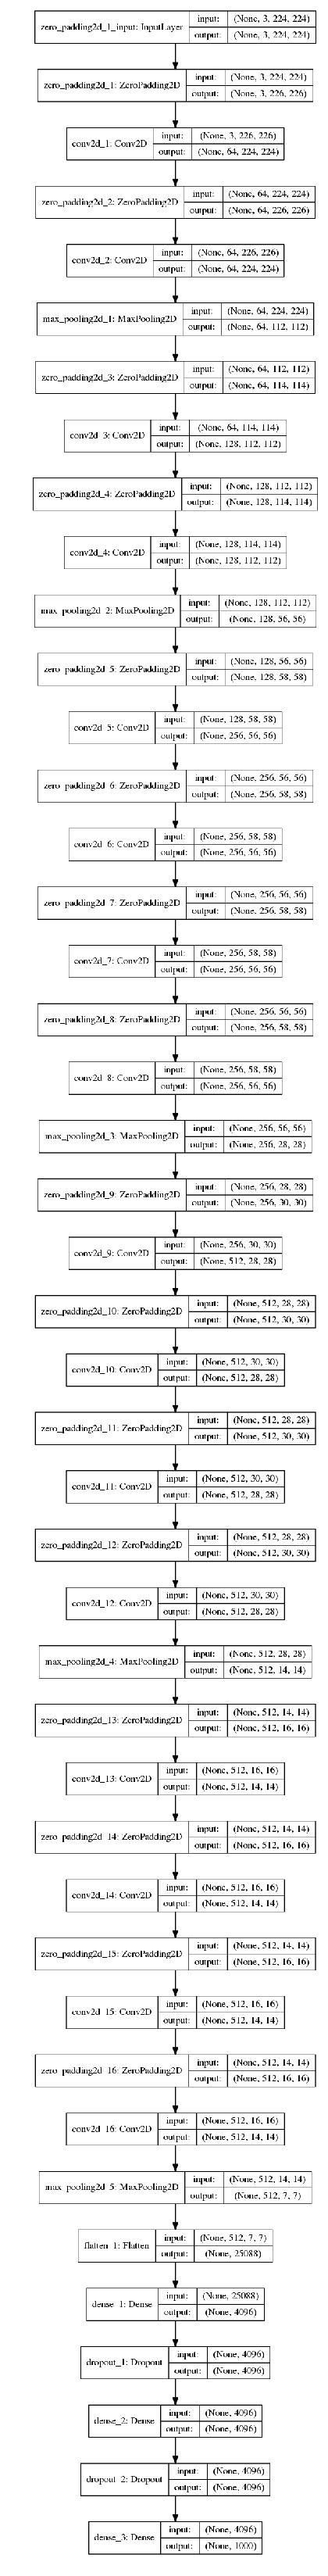

In [7]:
plt.figure(figsize=(30, 60))
plt.axis("off")
plt.imshow(img_model)
plt.show()

We have to compile the model, even though we have no intention of actually training it. This is because the compilation in part sets the forward propagation code, which we will need to do predictions.

In [8]:
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

The 'synset_words.txt' file contains the names of the classes. We need to load it

In [9]:
synsets = []
with open("./synset_words.txt", "r") as f:
    synsets += f.readlines()
synsets = [x.replace("\n","") for x in synsets]

Let us create a list of images that we want to classify.

In [10]:
fileList=['img/elephant.jpg','img/bus.jpg']

img/elephant.jpg


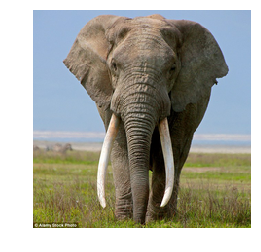

0.4155 - n01871265 tusker
0.2183 - n02504458 African elephant, Loxodonta africana
0.1095 - n01704323 triceratops
0.0496 - n02504013 Indian elephant, Elephas maximus
0.0370 - n01768244 trilobite
0.0191 - n01817953 African grey, African gray, Psittacus erithacus
0.0104 - n02398521 hippopotamus, hippo, river horse, Hippopotamus amphibius
0.0095 - n02056570 king penguin, Aptenodytes patagonica
0.0088 - n02071294 killer whale, killer, orca, grampus, sea wolf, Orcinus orca
0.0067 - n01855672 goose
*********
img/bus.jpg


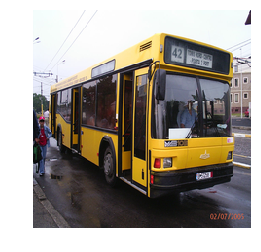

0.7940 - n04335435 streetcar, tram, tramcar, trolley, trolley car
0.1284 - n04487081 trolleybus, trolley coach, trackless trolley
0.0323 - n03895866 passenger car, coach, carriage
0.0134 - n03769881 minibus
0.0106 - n03902125 pay-phone, pay-station
0.0054 - n03272562 electric locomotive
0.0012 - n03496892 harvester, reaper
0.0011 - n03126707 crane
0.0010 - n04465501 tractor
0.0010 - n03417042 garbage truck, dustcart
*********


In [11]:
for actfile in fileList:
    
    # We are going to classify this image:
    print(actfile)
    # Load it
    im=Image.open(actfile).resize((224, 224), Image.ANTIALIAS)
    
    # Plot it
    plt.figure(figsize=(4, 4))
    plt.axis("off")
    plt.imshow(im)
    plt.show()
    
    # Preporcess the image
    im = np.array(im).astype(np.float32)

    # scale the image, according to the format used in training
    im[:,:,0] -= 103.939
    im[:,:,1] -= 116.779
    im[:,:,2] -= 123.68
    im = im.transpose((2,0,1))
    im = np.expand_dims(im, axis=0)
    
    # Now we can do the prediction
    out = model.predict(im)
    
    # Print 10 class labels with the highest  probabilities
    for index in np.argsort(out)[0][::-1][:10]:
        print("%01.4f - %s" % (out[0][index], synsets[index].replace("\n","")))
        
    print('*********')
        

    